In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/cleaned_data.csv')

In [3]:
# Save the cleaned data to a variable
data = df.clean_data

## Create WordCloud

In [4]:
# Combine all the text into a single string
long_string = " ".join(data)

# Initialize the wordcloud
wc = WordCloud(background_color='white', contour_color='steelblue', height=800, width=1000)

# Add data to the wordcloud
wc.generate(long_string)

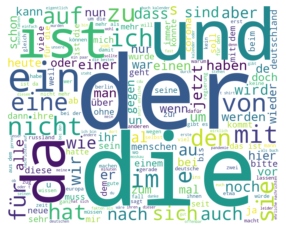

In [5]:
# Visualize wordcloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
# Save the cloud as a png file
wc.to_file('./wordclouds/german_wordcloud.png')

## Word Count

In [7]:
# Initialize counter vectorizer
vec = CountVectorizer()

# Transform to document term matrix
X = vec.fit_transform(data)

# Create DataFrame
tdm = pd.DataFrame(data=X.toarray(), columns=vec.get_feature_names_out())

In [8]:
tdm

,aaaaw,aachen,ab,abbildet,abdelaziz,abelio,abend,aber,abfahrt,abfahrtszeit,...,überwiesen,überzeugung,überzogen,üblich,übliche,üblichen,übrigen,übrigens,übung,üçerta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1869,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
word_count = tdm.sum(axis=0).sort_values(ascending=False)

# Top 25 most common words
word_count[:25]

die      925
der      863
in       628
und      622
das      426
ist      414
mit      313
ich      310
ein      303
nicht    294
im       273
den      269
von      266
zu       256
sie      254
es       237
für      236
auf      230
eine     217
sich     217
hat      204
wir      184
nach     163
als      160
auch     156
dtype: int64

In [10]:
# Save the top 100 most common words
word_count.to_csv('./data/most_common.csv', header=['count'], index_label='word')